In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from itertools import combinations
from random import uniform, seed, random
from math import cos, sin, pi, sqrt

def setup(r):
    plt.figure(figsize=(10,10))
    
    #draw circle
    circle = plt.Circle((0, 0), r, color='black', fill=False, linewidth=5)
    plt.gca().add_artist(circle)
    
    #triangle
    top   = polar(r, pi/2)
    right = polar(r, pi/2-(2*pi)/3)
    left  = polar(r, pi/2+(2*pi)/3)
    
    for combo in combinations([top, right, left], 2):
        plot_line(*combo, 
                  color = 'blue', 
                  zorder=10, 
                  linewidth=5)
        
    side_len = d(top, right)
    
    return top, side_len, r

In [5]:
def polar(r, theta):
    x = r*cos(theta)
    y = r*sin(theta)
    return (x, y)

In [6]:
def plot_line(p1, p2, **kwargs):
    linewidth = kwargs.get('linewidth', None)
    zorder = kwargs.get('zorder', None)
    color = kwargs.get('color', None)
    plt.plot(*zip(p1, p2), color = color, zorder = zorder, linewidth = linewidth)

In [7]:
def d(p1, p2):
    d = (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2
    return sqrt(d)

In [8]:
def pad(pad, r):
    upper = r + pad
    lower = -upper
    plt.xlim(lower, upper)
    plt.ylim(lower, upper)

Setup:

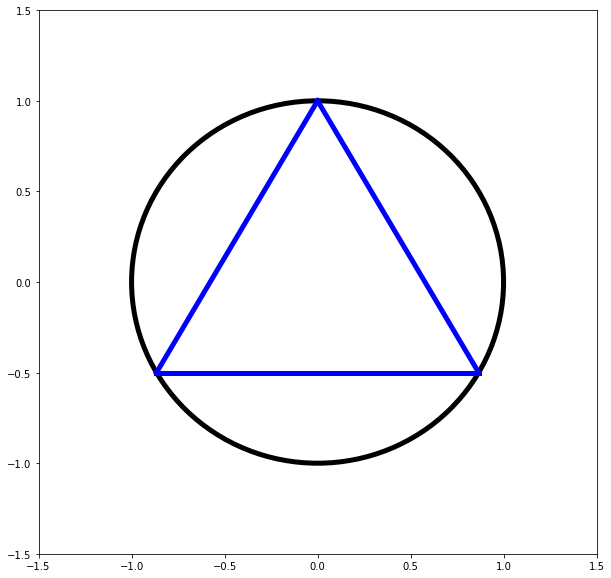

In [10]:
top, side_len, r = setup(r = 1)
pad(.5, r)
plt.savefig("setup.png", dpi = 600)
plt.show()

Method 1

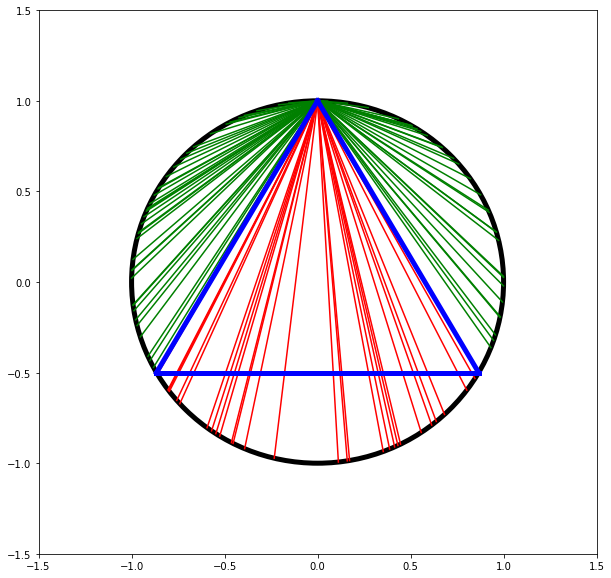

0.29


In [11]:
top, side_len, r = setup(r = 1)

seed(10)
record = 0
trial_n = 100

for i in range(trial_n):
    point = polar(r, uniform(0, 2*pi))
    if d(point, top) > side_len:
        color = 'red' 
        record +=1
    else:
        color = 'green'
    plot_line(top, point, color = color)
    
pad(.5, r)
plt.savefig("method_1.png", dpi = 600)
plt.show()

print(record/trial_n)

Method 2 setup:

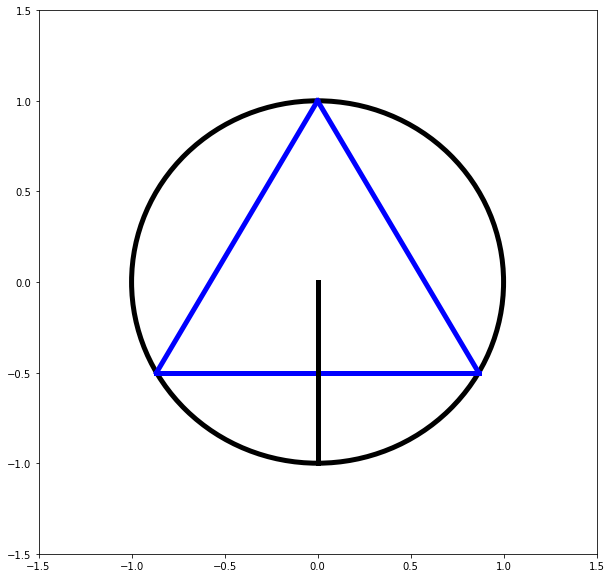

In [12]:
top, side_len, r = setup(r = 1)

bottom = polar(r, -pi/2)
plot_line(bottom, (0, 0), color = 'black', zorder=10, linewidth=5)
pad(.5, r)
plt.savefig("radius.png", dpi = 600)
plt.show()

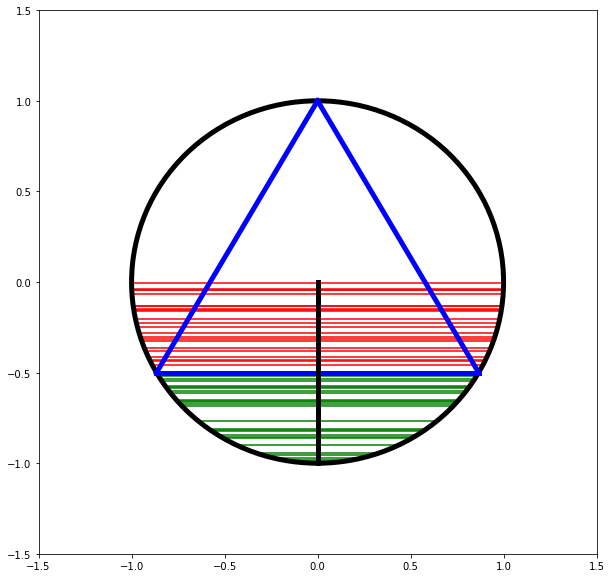

0.48


In [13]:
top, side_len, r = setup(r = 1)

bottom = polar(r, -pi/2)
plot_line(bottom, (0, 0), color = 'black', zorder=10, linewidth=5)

seed(10)
record = 0
trial_n = 50

for i in range(trial_n):
    midpoint = -uniform(0, r)
    
    h = r+midpoint
    c = sqrt((r-h/2)*(8*h))
    p1 = (-c/2, midpoint) 
    p2 = ( c/2, midpoint)
    
    if d(p1, p2) > side_len:
        color = 'red' 
        record +=1
    else:
        color = 'green'
    
    plot_line(p1, p2, color = color, zorder=0)
    
#limits and plot
pad(.5, r)
plt.savefig("method_2.png", dpi = 600)
plt.show()

print(record/trial_n)

Method 3:

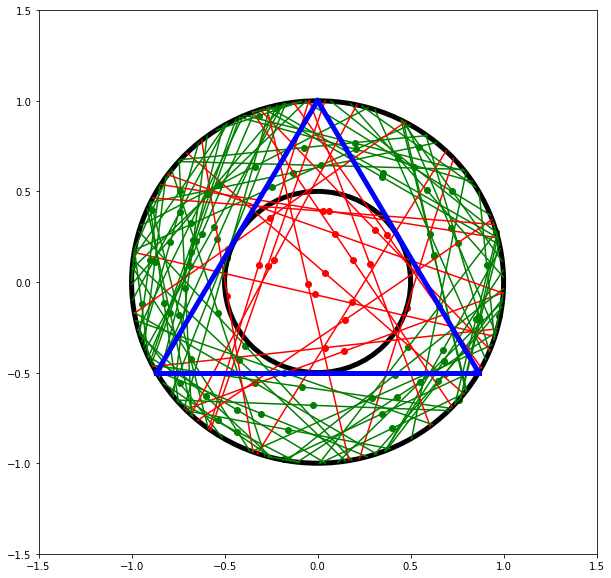

0.2


In [14]:
top, side_len, r = setup(r = 1)

circle1 = plt.Circle((0, 0), r/2, color='black', fill=False, linewidth=5)
plt.gcf().gca().add_artist(circle1)

seed(10)
record = 0
trial_n = 100

for i in range(trial_n):
    point = polar(r*sqrt(random()), uniform(0, 2*pi)) 
    x, y = point[0], point[1]
    
    slope = -x/y
    
    h = r-d((0, 0), point)
    c = sqrt((r-h/2)*(8*h))
    k = sqrt((c**2)/(4*slope**2+4))
    
    if c > side_len:
        color = 'red' 
        record +=1
    else:
        color = 'green'
    
    plot_line((x-k, y-k*slope), (x+k, y+k*slope), color = color)
    plt.scatter(*point, color = color)
    
#limits and plot
pad(.5, r)
plt.savefig("method_3.png", dpi = 600)
plt.show()

print(record/trial_n)

Explanatory graphs:

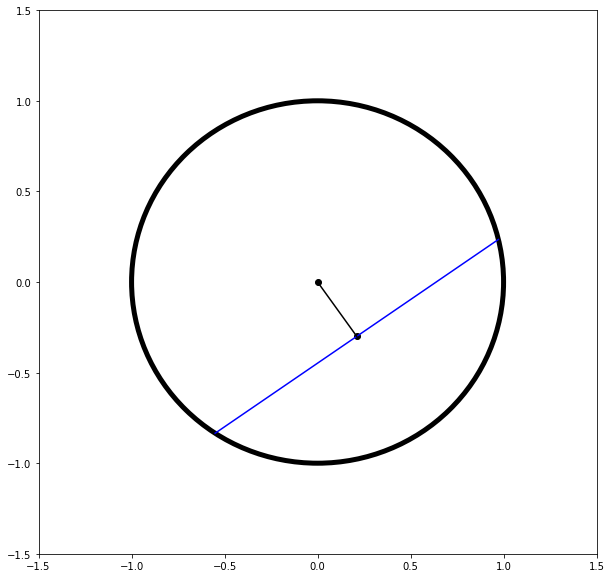

In [15]:
plt.figure(figsize=(10,10))
    
#draw circle
circle = plt.Circle((0, 0), r, color='black', fill=False, linewidth=5)
plt.gca().add_artist(circle)

#triangle
top   = polar(r, pi/2)
right = polar(r, pi/2-(2*pi)/3)
left  = polar(r, pi/2+(2*pi)/3)


side_len = d(top, right)


seed(1)
record = 0
trial_n = 1

for i in range(trial_n):
    point = polar(r*sqrt(random()), 2*pi*random()) 
    x, y = point[0], point[1]
    
    slope = -x/y
    
    h = r-d((0, 0), point)
    c = sqrt((r-h/2)*(8*h))
    k = sqrt((c**2)/(4*slope**2+4))
    
    plt.scatter(*point, color = 'black')
    plt.scatter(*(0, 0), color = 'black')
    
    plot_line((x-k, y-k*slope), (x+k, y+k*slope), color = 'blue')
    plot_line((0, 0), point, color='black')
    
    
#limits and plot
pad(.5, r)
plt.savefig("m3_ex.png", dpi = 600)
plt.show()

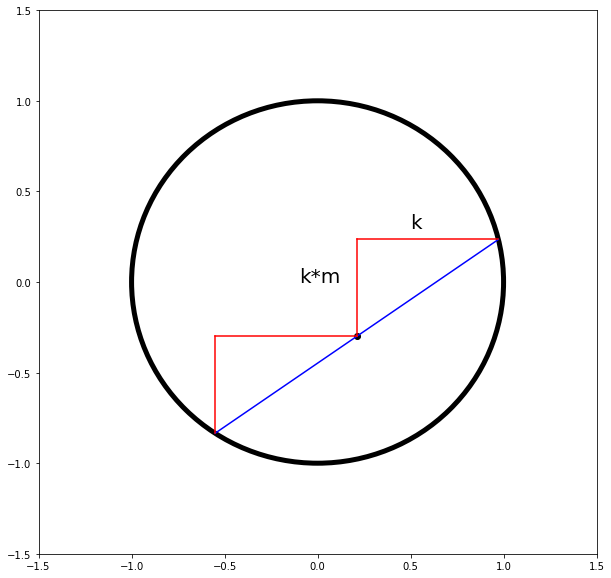

In [16]:
plt.figure(figsize=(10,10))
    
#draw circle
circle = plt.Circle((0, 0), r, color='black', fill=False, linewidth=5)
plt.gca().add_artist(circle)

#triangle
top   = polar(r, pi/2)
right = polar(r, pi/2-(2*pi)/3)
left  = polar(r, pi/2+(2*pi)/3)


side_len = d(top, right)


seed(1)
record = 0
trial_n = 1

for i in range(trial_n):
    point = polar(r*sqrt(random()), 2*pi*random()) 
    x, y = point[0], point[1]
    
    slope = -x/y
    
    h = r-d((0, 0), point)
    c = sqrt((r-h/2)*(8*h))
    k = sqrt((c**2)/(4*slope**2+4))
    
    plt.scatter(*point, color = 'black')
    #plt.scatter(*(0, 0), color = 'black')
    
    plot_line((x-k, y-k*slope), (x+k, y+k*slope), color = 'blue')
    #plot_line((0, 0), point, color='black')
    
    plot_line(point, (x, y+k*slope), color='red')
    plot_line((x, y+k*slope), (x+k, y+k*slope), color='red')
    plot_line(point, (x-k, y), color='red')
    plot_line((x-k, y-k*slope), (x-k, y), color='red')
    
    plt.annotate("k", xy=(.5,.3), size=20)
    plt.annotate("k*m", xy=(-.1,0), size=20)
    
#limits and plot
pad(.5, r)
plt.savefig("m3_ex2.png", dpi = 600)
plt.show()